In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scraper
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [2]:
def fetch_csv(directory='/home/jupyter/',ticker='AMZN'):
    try:
        data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t') 
    except Exception:
        print('Reading csv for ticker %s failed' %ticker)
        try:
            scraper.somethingScraper(directory=directory, ticker=ticker)
        except Exception:
            print('Scrapping failed for ticker %s ' %ticker)
            data = pd.dataframe()
        else:
            data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t')
    else:
        print('Read csv for ticker %s successful' %ticker)
    
    return data

In [3]:
df = fetch_csv()

Read csv for ticker AMZN successful


In [4]:
data = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume",fillna=False)

/opt/conda/lib/python3.7/site-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [33]:
#pd.DataFrame(data.isna().sum(axis = 0))

In [5]:
data.isna().any().sum()

51

In [32]:
#pd.DataFrame(data.isna().sum(axis = 0)).tail(40)

In [6]:
data = data.drop(data.head(50).index)
data = data.drop(['trend_psar_up','trend_psar_down','Adj Close'],axis=1,inplace=False)

In [7]:
data.isna().any().sum()

1

In [31]:
#pd.DataFrame(data.isna().sum(axis = 0)).head(40)

In [30]:
#pd.DataFrame(data.isna().sum(axis = 0)).tail(40)

In [56]:
#data.describe().to_csv('describe.csv')

In [8]:
data.shape

(5763, 76)

In [22]:
extract = data.head(76)
extract.shape

(76, 76)

In [16]:
def scale_0_1(df):
    df = df.copy()
    scaler = MinMaxScaler()
    df[df.select_dtypes(exclude='object').columns]=scaler.fit_transform(df[df.select_dtypes(exclude='object').columns])
    return df

In [15]:
def scale_1_1(df):
    df = df.copy()
    scaler = MaxAbsScaler()
    df[df.select_dtypes(exclude='object').columns]=scaler.fit_transform(df[df.select_dtypes(exclude='object').columns])
    return df

In [23]:
extract = scale_1_1(extract)

In [18]:
extract.describe()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.897917,0.915904,0.893240,0.905777,0.377044,-0.891724,0.951745,0.551949,0.272310,0.706732,...,0.893854,0.549979,0.574882,-0.617743,0.388297,0.987971,-0.150993,-0.026457,-0.036757,0.551500
std,0.048052,0.049935,0.051398,0.049684,0.233779,0.049842,0.021769,0.279553,0.317000,0.183747,...,0.053722,0.255406,0.226941,0.246829,0.505564,0.012067,0.521884,0.535308,0.549780,0.236493
min,0.820833,0.819127,0.798283,0.823529,0.118644,-1.000000,0.917155,-0.028585,-0.035021,0.351908,...,0.794962,0.154439,0.247867,-1.000000,-0.375526,0.966300,-1.000000,-0.831467,-0.884088,0.160001
25%,0.863542,0.879418,0.860515,0.872899,0.208188,-0.931124,0.935924,0.337095,0.030094,0.609694,...,0.861052,0.355151,0.424210,-0.806028,-0.011926,0.977700,-0.478070,-0.388480,-0.406848,0.395001
50%,0.891667,0.918919,0.888412,0.888655,0.316924,-0.891800,0.949850,0.574731,0.154613,0.743738,...,0.895526,0.554172,0.545161,-0.613690,0.368158,0.991649,-0.105235,-0.093697,-0.097430,0.470000
75%,0.934375,0.957900,0.927039,0.937500,0.525860,-0.857620,0.963795,0.682128,0.444049,0.804626,...,0.922093,0.665954,0.698344,-0.505662,0.895056,0.998289,0.204442,0.247511,0.253627,0.702500
max,1.000000,1.000000,1.000000,1.000000,1.000000,-0.808130,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.182834,1.000000,1.000000,0.989959,1.000000,1.000000,1.000000


In [24]:
extract.set_index('Date',inplace=True)
                
extract.index = pd.to_datetime(extract.index)


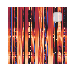

In [43]:
fig = plt.figure(figsize=(1, 1),dpi=76,frameon=False)
plt.legend('off')
plt.axis('off')
ax = sns.heatmap(extract,center=0,robust=True,cbar=False)


In [44]:
 fig.savefig(fname='heat_test.png',pad_inches=0,quality=100,format='png')#0